# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday September 14th**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a url is given for a data set, you will find the required data in the same directory as this assignment on GitHub.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Problem 1 
***

Rebecca cares about [octopuses](https://english.stackexchange.com/questions/270/what-is-the-correct-plural-of-octopus/271). She cares so much that, up and down the coast, she opens octopus rescues, octopus temporary housing, and octopus sanctuaries, specifically targeted at juveniles in need. For convenience, we will refer to all the Juvenile Octopus Rescues, Temps, and Sanctuaries as "JORTS."

Rebecca wants to estimate the average food consumption across the JORTS this month so that she can plan the food orders for next month. She has 14 Rescues, 35 Temporary houses, and 56 Sanctuaries. What an empire!

Rebecca opens up the *JORTS Manager App* on her phone, which gives her a list of all of her coastal operations. She randomly picks 15 of them, and gets ready to email their managers asking for the monthly food reports. Of course, Rebecca has taken CSCI 3022, so she knows a thing or two about sampling, and so, to get a good estimate of the monthly food consumption (kilograms per month) for typical JORTS, she intentionally chooses 2 Rescues, 5 Temporary houses, and 8 Sanctuaries.

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest 

***
#### P1 Answers:
***
__Population__ : All of Rebecca's _JORTS_<br>
__Sample Frame__ : Emails from individual _JORTS_ managers<br>
__Sample__ : 15 _JORTS_ that she randomly picked<br>
__Type of Sample__ : Stratified Sample<br>
__Quantity of Interest__ : Monthly food consumption (kilograms per month) for typical _JORTS_<br>
***

### Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ changes. To illustrate this, consider the dataset

$$
4.6 \quad 
5.0 \quad
6.5 \quad
7.7 \quad
y \quad
4.2 \quad
1.9
$$

**Part A**: Compute the sample mean and sample median for $y=0$. Compute them both again for $y=10$.

In [3]:
defaultArray = np.array([4.6, 5.0, 6.5, 7.7, 4.2, 1.9])
%timeit A1 = pd.Series(defaultArray).mean()
%timeit A2 = np.array(defaultArray).mean()
%timeit P1 = pd.Series(defaultArray).median()
%timeit P2 = np.median(defaultArray)

52.9 µs ± 5.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
4.29 µs ± 290 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
49.4 µs ± 1.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
26.7 µs ± 167 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


***
#### Results of Timing Test: 
Comparing the mean and median functions of NumPy and Pandas shows that NumPy is faster for both operations so this is what I'll use to calculate the sample mean and median for y = 0 and y = 10
***

In [4]:

Y0 = np.append(defaultArray, 0)
Y10 = np.append(defaultArray, 10)
mean0 = Y0.mean()
median0 = np.median(Y0)
mean10 = Y10.mean()
median10 = np.median(Y10)
print("Sample mean (y = 0): " + mean0.astype(str))
print("Sample median (y = 0): " + median0.astype(str))
print("Sample mean (y = 10): " + mean10.astype(str))
print("Sample median (y = 10): " + median10.astype(str))
#to find out if these are outliers according to the definition within the boxplot section in the textbook, find 1.5*IQR
q75, q25 = np.percentile(Y0, [75 ,25])
iqr = q75 - q25
topWhisker = q75 + 1.5 * iqr
bottomWhisker = q25 - 1.5*iqr
print(topWhisker, bottomWhisker)

Sample mean (y = 0): 4.271428571428571
Sample median (y = 0): 4.6
Sample mean (y = 10): 5.7
Sample median (y = 10): 5.0
9.8 -1.0000000000000009


***
#### Part A Conclusion:
To compare how the values 0 and 10 affect the mean and median when adjusting Y, I made two arrays and calculated the median and mean for each. I also calculated the top whisker and bottom whisker amount to compare these values to the defintion of _outlier_ from the section of the book on _BoxPlots_. Both of these values are close the outskirts of what is considered an outlier, so nothing can really be said about the sensitivity to outliers by comparing these two values, because they are so close to the "borders" of outliers but on opposite ends of the spectrum.
***

**Part B**: What should $y$ be if we want the mean to be equal to $10$? What should $y$ be if we want the mean to be equal to $0$?

In [5]:
#find the xk for mean, with some error checking for accuracy
# def findXkForMean(a, mean):
#     returnVal = ((mean * (defaultArray.size + 1)) - (defaultArray.sum()))
#     finalArray = np.append(a,returnVal)
#     assert(equal_float(mean, finalArray.mean()))
#     return ((mean * (defaultArray.size + 1)) - (defaultArray.sum()))

#arbitrary 0.001 chosen for value to compare int to float for error checking
# def equal_float(a,b):
#     return abs(a-b) <= 0.001
    
def find_xk_for_mean(data_set, mean):
    return ((mean * (data_set.size + 1)) - (data_set.sum()))

print("x bar = 10")
print(find_xk_for_mean(defaultArray, 10))
print("x bar = 0")
print(find_xk_for_mean(defaultArray, 0))

x bar = 10
40.1
x bar = 0
-29.9


***
(Mostly for practice using LaTeX)<br>
__Mean__: $$\bar{x}=\frac{1}{n}\sum_{k=1}^{n}x_k$$
__Mean (Expanded)__: $$\bar{x} = \frac{x_1 + x_2 + \ldots + x_n}{n}$$ 
__Solve for__ ${x_k}$ __to get prefered mean:__ 
$$\bar{x} = \frac{x_1 + x_2 + \ldots + x_k + \ldots + x_n}{n}$$ 
Times n
$$\bar{x} * n = x_1 + x_2 + \ldots + x_k + \ldots + x_n$$ 
Subtract $x_k$
$$(\bar{x} * n) - x_k = x_1 + x_2 + \ldots + x_{k-1} + x_{k+1} + \ldots + x_n$$ 
Subtract $(\bar{x} * n)$
$$-x_k = x_1 + x_2 + \ldots + x_{k-1} + x_{k+1} + \ldots + x_n - (\bar{x}*n)$$
Times -1
$$x_k = (\bar{x}*n) - (x_1 + x_2 + \ldots + x_{k-1} + x_{k+1} + \ldots + x_n)$$
***

***
#### Part B Conclusion:
We can really tweak the mean of a dataset by adding crazy outliers to the set, showcasing the volatility of the mean when dealing with a dataset that has some serious outliers.
***

**Part C**: Compute the sample median for the following cases: 
- $y=10$ 
- $y=100$ 
- $y \to \infty$ 
- $y=5.01$ 
- $y=4.99$

In [6]:
import sys
def median_when_adding_datum(data_set, datum_to_add):
    return np.median(np.append(data_set, datum_to_add))

ten = median_when_adding_datum(defaultArray, 10)
print(f'y = 10; median = {ten}')
hundred = median_when_adding_datum(defaultArray, 100)
print(f'y = 100; median = {hundred}')
#use traditional maxsize of int to represent infinity in this case,
#where we don't need infinity to get the same result as a REALLY big value
inf = median_when_adding_datum(defaultArray, sys.maxsize)
print(f'y = inf; median = {ten}')
five_o_one = median_when_adding_datum(defaultArray, 5.01)
print(f'y = 5.01; median = {five_o_one}')
four_nine_nine = median_when_adding_datum(defaultArray, 4.99)
print(f'y = 4.99; median = {four_nine_nine}')

y = 10; median = 5.0
y = 100; median = 5.0
y = inf; median = 5.0
y = 5.01; median = 5.0
y = 4.99; median = 4.99


***
#### Part C Conclusion:
The information from the results of the cell above show that even with extreme outliers, such as an infinite value, do not make drastic changes to the median. This is illustrated by all of the median values being the same except for a small change for the last value of Y.
***


**Part D**: Think about the previous parts, above, and describe in words or mathematical notation the answers to the following two questions:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?
- By varying $y$, what is the set of all the possible values that the sample median could take on?

***
#### Part D Conclusions:
By varying y, the set of all the possible values that the sample __mean__ could take on is $\mathbb{R}$.

This can be proven by showing that our definition of mean approaches $\infty$ as y ($x_k$) changes (if there is no $y\to-\infty$ elsewhere in the set) <br><br>
$$\lim_{x_k\to\infty}\frac{x_1 + x_2 + \ldots + x_k + \ldots + x_n}{n} = \infty$$
And by showing that our definition of mean approaches $-\infty$ as y ($x_k$) changes (if there is no $y\to\infty$ elsewhere in the set) <br><br>
$$\lim_{x_k\to-\infty}\frac{x_1 + x_2 + \ldots + x_k + \ldots + x_n}{n} = -\infty$$

__Conclusion Mean__:<br>
These limits are true because the numerator tends towards + or - $\infty$ while the denominator remains constant. If we vary Y based on the set of all $\mathbb{R}$, it follows that the mean could be anywhere in $\mathbb{R}$ because of the infinite precision of Real Numbers.
***
When considering the __median__, there are a few cases that we can consider to prove what the possible values are.
First, to make things easier, we sort the dataset and take out y.
$$
1.9 \quad
4.2 \quad
4.6 \quad
5.0 \quad
6.5 \quad
7.7
$$
There are 6 elements of this dataset, but when we add a (varying) y, there will be 7. The mean of the final dataset we will consider is the 4th element which separates the data into equal halves.

__Case 1:__ <br>
Possible Sets:
$$
1.9 \quad
4.2 \quad
4.6 \quad
y \quad
5.0 \quad
6.5 \quad
7.7
$$
If we add Y to the 4th spot in the dataset, the median value is guarenteed to be y itself. If in element 4, that makes the set of possible y values $\{y\in\mathbb{R}\: | \: 4.6\le y \le 5.0\}$ set of this type will be denoted as $[4.6, 5.0]$ from here on out. So.... for Case 1, $Med(dataset) = [4.6, 5.0]$<br><br>
__Case 2:__ <br>
Possible Sets:
$$
y \quad
1.9 \quad
4.2 \quad
4.6 \quad
5.0 \quad
6.5 \quad
7.7
$$
$$
1.9 \quad
y \quad
4.2 \quad
4.6 \quad
5.0 \quad
6.5 \quad
7.7
$$
$$
1.9 \quad
4.2 \quad
y \quad
4.6 \quad
5.0 \quad
6.5 \quad
7.7
$$
If we add Y to the 1st-3rd spot in the dataset, this makes possible values for y $(-\infty, 4.6]$. These values of y will guarentee a median of 4.6. So... for Case 2, $Med(dataset) = 4.6$<br><br>
__Case 3:__ <br>
Possible Sets:
$$
1.9 \quad
4.2 \quad
4.6 \quad
5.0 \quad
y \quad
6.5 \quad
7.7
$$
$$
1.9 \quad
4.2 \quad
4.6 \quad
5.0 \quad
6.5 \quad
y \quad
7.7
$$
$$
1.9 \quad
4.2 \quad
4.6 \quad
5.0 \quad
6.5 \quad
7.7 \quad
y
$$
If we add Y to the 5th-7th spot in the dataset, this makes possible values for y $[5.0, \infty)$. These values of y will guarentee a median of 5.0. So... for Case 3, $Med(dataset) = 5.0$

__Conclusion Median__:<br>
The first case includes both of the second cases, so the final possible values for $\{y \in \mathbb{R}\}$ is $Med(dataset) = [4.6, 5.0]$

### Part D Conclusion:
Clearly based on these results we can determine that the mean varies wildly for possible outliers in the dataset while the median is much more contained for varying values of y.
***

### Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

1.
$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$
2.
$$
(\bar{x}_n * n) = (\bar{x}_{n-1} * n) + x_n - \bar{x}_{n-1}
$$
3.
$$
((\frac{1}{n}\sum_{k=1}^n x_k) * n) = (\bar{x}_{n-1} * n) + x_n - \bar{x}_{n-1}
$$
4.
$$
(\sum_{k=1}^n x_k) = (\bar{x}_{n-1} * n) + x_n - \bar{x}_{n-1}
$$
5.
$$
(\sum_{k=1}^n x_k) = (\bar{x}_{n-1} * n) + x_n + (\bar{x}_{n-1} * (-1))
$$
6.
$$
(\sum_{k=1}^n x_k) = ((\frac{1}{n - 1})\sum_{k=1}^{n - 1} x_k) * (n - 1) + x_n
$$
7.
$$
(\sum_{k=1}^n x_k) = (\sum_{k=1}^{n - 1} x_k) + x_n
$$
8.
$$
(\sum_{k=1}^n x_k) = x_1 + x_2 + \dots + x_{n-1} + x_n
$$
9.
$$
\sum_{k=1}^n x_k = \sum_{k=1}^n x_k \blacksquare
$$

**Part B**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class (written above). You may *not* use numpy's built in mean function. Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class (written above). You may *not* use any built-in sample variance functions.

In [7]:
def my_sample_mean(numpyarr):
    return numpyarr.sum()/numpyarr.size

def my_sample_var(numpyarr):
    mean = my_sample_mean(numpyarr)
    n = numpyarr.size
    inside_sum = np.vectorize(lambda x: (x - mean)**2)(numpyarr) 
    return (1/(n - 1))*inside_sum.sum()

***
#### Part B Conclusion:
We take these built-in functions for granted! That was a headache. (and a lot of Google-fu... Vectorizing functions?? For such a small data set?? Might as well get some practice :D)
***

**Part C**: Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the counts of perfectly round suckers found on a set of aquarium octopuses.

`octopus_suckers = [25, 29, 40, 19, 7, 6, 3, 11, 19, 21, 22, 45, 27]`

In [8]:
#dataset definition
octopus_suckers = np.array([25, 29, 40, 19, 7, 6, 3, 11, 19, 21, 22, 45, 27])

#arbitrary 0.001 chosen for value to compare floats to compensate for small errors
def equal_float(a,b):
    return abs(a-b) <= 0.001

def test_my_sample_var(numpyarr):
    assert(equal_float(my_sample_var(numpyarr), np.var(numpyarr, ddof=1)))
    
def test_my_sample_mean(numpyarr):
    assert(my_sample_mean(numpyarr) == numpyarr.mean())

    
#test functions
test_my_sample_var(octopus_suckers)
test_my_sample_mean(octopus_suckers)

#define
mean = my_sample_mean(octopus_suckers)
var = my_sample_var(octopus_suckers)

#print
print(f'Mean: {mean}')
print(f'Variance: {var}')

Mean: 21.076923076923077
Variance: 158.9102564102564


***
#### Part C Conclusion:
The functions work as tested against the values computed by NumPy.
***

**Part D**: Implement a third function called `update_mean` that implements the formula whose valdity you proved in Part A. (Note: this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$.)

Use this function to compute the values that you get from taking the mean of the first suckers count, the first two suckers counts, the first three suckers counts, and so on up to all the suckers counts. Store your means in a numpy array called `sucker_means`.

In [9]:
#tail recursion doesn't matter in python but let's try it anyway...
#returns a float, what kind of float i'm not really sure yet...
def update_mean(x_n, mean_x_n_minus_one, n):
    return mean_x_n_minus_one + ((x_n - mean_x_n_minus_one)/n)

sucker_means = 0
for i in range(0, octopus_suckers.size):
    sucker_means = update_mean(octopus_suckers[i], sucker_means, i + 1)
    
print(f'Mean from updating: {sucker_means}')
#test
print("Testing...")
assert(equal_float(sucker_means, octopus_suckers.mean()))

Mean from updating: 21.076923076923077
Testing...


In [10]:
#recursive would be a more elegant solution
def update_mean_rec(numpyarr):    
    #uninformed precondition
    assert(numpyarr.size >= 1)
    
    #base cases
    if numpyarr.size == 1:
        return numpyarr.sum()
    elif numpyarr.size == 2:
        return numpyarr[0] + (1/2)*(numpyarr[1] - numpyarr[0])
    
    #inductive step
    cutoff_index = numpyarr.size - 1
    new_arr = numpyarr[:cutoff_index]
    return update_mean_rec(new_arr) + (numpyarr[cutoff_index] - update_mean_rec(new_arr))/numpyarr.size

print(update_mean_rec(octopus_suckers))

21.076923076923077


***
(Extras for the recursive version...)
***
__Base Case Algebraically for reference__<br>
1.
$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}, n = 2
$$
2.
$$
\bar{x}_2 = \bar{x}_{1} + \frac{x_2 - \bar{x}_{1}}{2}
$$
3.
$$
\bar{x}_2 = x_1 + \frac{x_2 - x_1}{2}
$$
4.
$$
\bar{x}_2 = x_1 + \frac{1}{2}(x_2 - x_1)
$$
***

***
#### Part D Conclusion:
There is a way to solve the mean using this inductive method both recursively and not so recursively. This allows the mean to be calculated one step at a time instead of having to sum all of the pieces together and then find it that way.
***

### Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.  

In [11]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**: Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours insteas. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

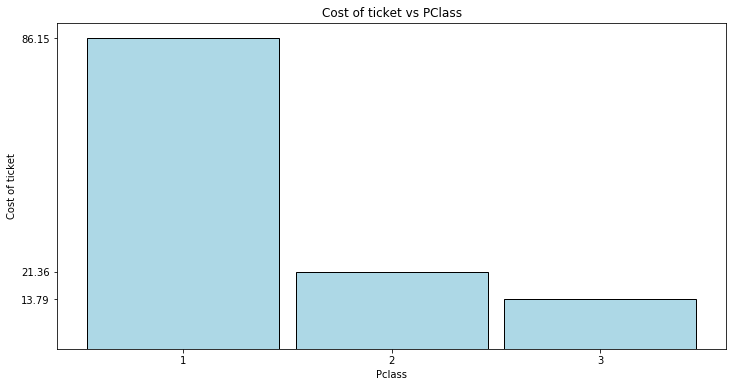

In [12]:
#no NaN values in Fare, but there is at least one zero. This could be a problem so I'm going to filter it out
# print(np.sort(df["Fare"].unique()))
df_titanic_clean_fare = df.loc[df["Fare"] != 0]
average_price_of_ticket_1 = df_titanic_clean_fare.loc[df_titanic_clean_fare["Pclass"] == 1]["Fare"].mean()
# print(average_price_of_ticket_1)
average_price_of_ticket_2 = df_titanic_clean_fare.loc[df_titanic_clean_fare["Pclass"] == 2]["Fare"].mean()
# print(average_price_of_ticket_2)
average_price_of_ticket_3 = df_titanic_clean_fare.loc[df_titanic_clean_fare["Pclass"] == 3]["Fare"].mean()
# print(average_price_of_ticket_3)

#bar chart for list code found on this stack overflow page:
#https://stackoverflow.com/questions/34029865/how-to-plot-bar-chart-for-a-list-in-python
data=[('1',average_price_of_ticket_1),('2',average_price_of_ticket_2),('3',average_price_of_ticket_3)]

labels, ys = zip(*data)
xs = np.arange(len(labels)) 
width = 0.92

fig = plt.figure()
fig.set_size_inches(12,6)
ax = fig.gca()  #get current axes
ax.bar(xs, ys, width, 
       align='center',
       edgecolor = "Black",
       facecolor = "LightBlue")
plt.title("Cost of ticket vs PClass")
plt.xlabel("Pclass")
plt.ylabel("Cost of ticket")

#Remove the default x-axis tick numbers and  
#use tick numbers of your own choosing:
ax.set_xticks(xs)
#Replace the tick numbers with strings:
ax.set_xticklabels(labels)
#Remove the default y-axis tick numbers and  
#use tick numbers of your own choosing:
ax.set_yticks(ys)

***
### Part A Conclusions:
__Class Warfare__: If the class warfare claim is accurate we could expect to see a higher likelyhood of survival the higher a person's passenger class is. More people in class 1 would survive than class 2, and more class 2 than class 3 would survive. This guess is based on the assumption that the "higher" class is 1 > 2 > 3. I found these results by calculating the average price of a ticket for these classes, and assumed that the higher price designates a person of higher class in the Titanic heirarchy.

__Male Chivalry__: If the chivilry claim is true we could expect to see more women and children survive than adult men.
***

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

In [13]:
# possible values:
# These next few lines show all the possible values for the 3 columns that don't have missing values.
# Printing these shows that the only values in here are the expected ones, with none missing, so...
# Only have to filter out the age when it is unknown
# print(df["Sex"].unique())
# print(df["Pclass"].unique())
# print(df["Survived"].unique())

dfTitanic = df.loc[~np.isnan(df["Age"])]

***
### Part B Conclusions:
The lines that are commented out are to check what all the possible values are for these columns. There are only expected values within these columns, which means no values are missing. The age column however does have missing values and is the only column out of these four that needs to be cleaned.
***

**Part C**: Determine the fraction of survivors from each passenger class. 

Percentage of Class 1 Surviving: 0.6428571428571429
Percentage of Class 2 Surviving: 0.4827586206896552
Percentage of Class 3 Surviving: 0.2518703241895262


Text(0.5,1,'Percentage of passengers surviving based on PClass')

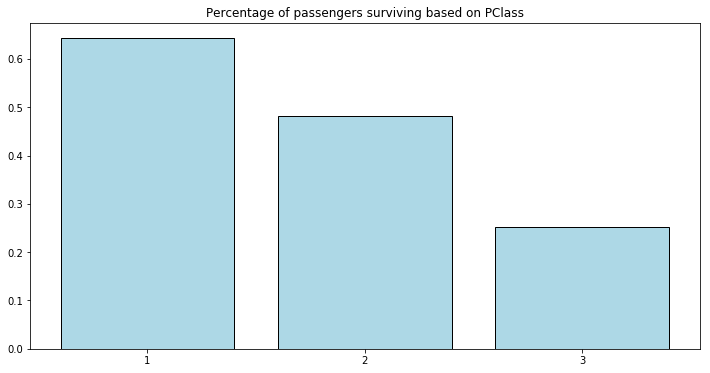

In [14]:
one_total = dfTitanic.loc[dfTitanic["Pclass"] == 1].shape[0]
two_total = dfTitanic.loc[dfTitanic["Pclass"] == 2].shape[0]
three_total = dfTitanic.loc[dfTitanic["Pclass"] == 3].shape[0]
one_survived = dfTitanic.loc[dfTitanic["Survived"] == 1].loc[dfTitanic["Pclass"] == 1].shape[0]
two_survived = dfTitanic.loc[dfTitanic["Survived"] == 1].loc[dfTitanic["Pclass"] == 2].shape[0]
three_survived = dfTitanic.loc[dfTitanic["Survived"] == 1].loc[dfTitanic["Pclass"] == 3].shape[0]
print("Percentage of Class 1 Surviving:", one_survived / one_total)
print("Percentage of Class 2 Surviving:",two_survived / two_total)
print("Percentage of Class 3 Surviving:",three_survived / three_total)
fig, axes = plt.subplots(1,1,figsize=(12,6))
xs = ["1","2","3"]
ysurvived = [one_survived / one_total, two_survived / two_total, three_survived / three_total]

axes.bar(xs, ysurvived, 
        edgecolor = "Black", 
        facecolor = "LightBlue")

plt.title("Percentage of passengers surviving based on PClass")

***
### Part C Conclusions:
By the looks of it, the class warfare theory is shaping up to be true based on the notion that a higher percentage of people survived in each class than the class below. %Survive[1] > %Survive[2] > %Survive[3]
***

**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

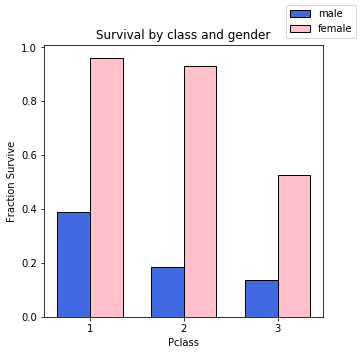

In [22]:
class_gender_dataframe = dfTitanic.loc[:, ["Survived", "Sex", "Pclass"]]
cgfractionsurvive = []
for c in np.sort(class_gender_dataframe["Pclass"].unique()):
    for s in class_gender_dataframe["Sex"].unique():
        specificcgdf = class_gender_dataframe.loc[class_gender_dataframe["Sex"] == s].loc[class_gender_dataframe["Pclass"] == c]
        totalincg = specificcgdf.shape[0]
        totalsurvivecg = specificcgdf.loc[specificcgdf["Survived"] == 1].shape[0]
        cgfractionsurvive.append(((s + str(c)),(totalsurvivecg / totalincg)))
class_gender_dataframe.head()
males_survive = [v for i, v in enumerate(cgfractionsurvive) if ("male" in v[0]) and ("female" not in v[0])]
females_survive = [v for i, v in enumerate(cgfractionsurvive) if ("female" in v[0])]
fig, axes = plt.subplots(1,1, figsize = (5,5))
width = 0.35
rects1 = axes.bar(range(1,4), [i[1] for i in males_survive],width, label = "male",  color='royalblue', edgecolor = "black")
rects2 = axes.bar([i + width for i in range(1,4)], [i[1] for i in females_survive],width, label = "female", color='pink', edgecolor = "black")
# add some
axes.set_ylabel('Fraction Survive')
axes.set_title('Survival by class and gender')
axes.set_xticks([i + width/2 for i in range(1,4)])
axes.set_xlabel("Pclass")
axes.set_xticklabels( ('1', '2', '3') )
fig.legend()

***
### Part D Conclusions:
The answer to the question is that more females in the lowest class survived than men in the highest class. We can gather that the "Male Chivalry" theory had more of an impact than "Class Warfare" because of the way that this table is structured. Before, we found that more 1st class passengers survived than each of the other classes, but we can see a higher percentage of women survived compared to men in their own class and every other class.
***

**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

[Text(0,0,'under 10'),
 Text(0,0,'10-20'),
 Text(0,0,'20-30'),
 Text(0,0,'30-40'),
 Text(0,0,'40-50'),
 Text(0,0,'50-60'),
 Text(0,0,'60-70'),
 Text(0,0,'70-80'),
 Text(0,0,'80+')]

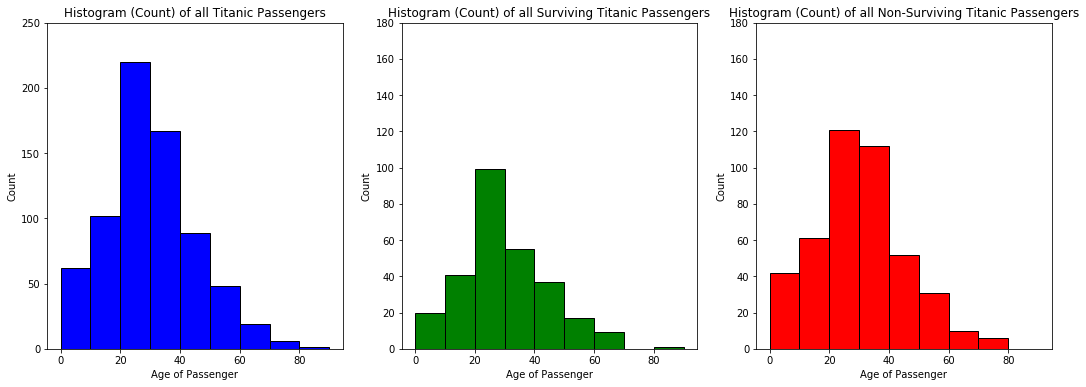

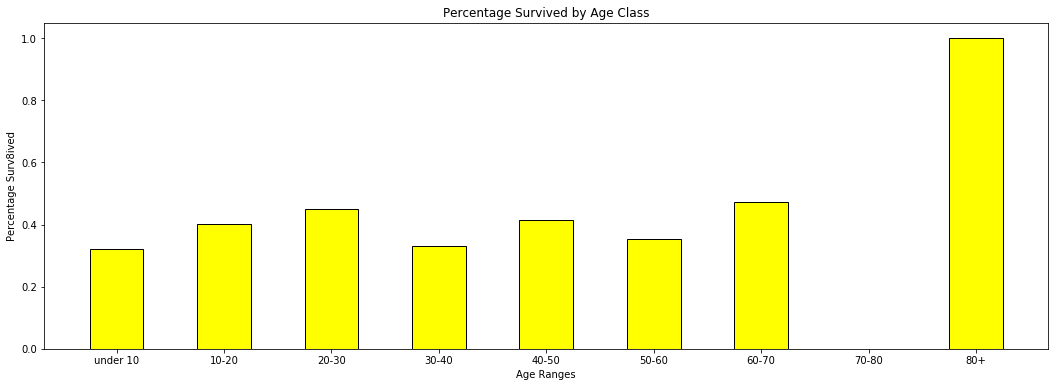

In [106]:
# since dfTitanic is already cleaned based on Age column, we can make a histogram from this data and examine
fig, ax = plt.subplots(1,3,figsize=(18,6))
fig2, ax2 = plt.subplots(1,1,figsize=(18,6))
countarr0 = ax[0].hist(dfTitanic["Age"],
       edgeColor = "Black",
       faceColor = "Blue",
       bins=range(0, 90 + 10, 10))
countarr1 = ax[1].hist(dfTitanic.loc[dfTitanic["Survived"] == 1]["Age"],
            edgeColor = "Black",
            faceColor = "Green",
                      bins=range(0, 90 + 10, 10))

countarr2 = ax[2].hist(dfTitanic.loc[dfTitanic["Survived"] == 0]["Age"],
            edgeColor = "Black",
            faceColor = "Red",
                      bins=range(0, 90 + 10, 10))
d = {"Total":countarr0[0],
     "Survived":countarr1[0]}
ax2.bar(range(1,10),
        d["Survived"]/d["Total"],
        width=0.50,
       facecolor = "Yellow",
       edgecolor = "Black")
ax[0].set_xlabel("Age of Passenger")
ax[0].set_ylabel("Count")
ax[0].set_title("Histogram (Count) of all Titanic Passengers")
ax[0].set_ylim(0,250)

ax[1].set_xlabel("Age of Passenger")
ax[1].set_ylabel("Count")
ax[1].set_ylim(0,180)
ax[1].set_title("Histogram (Count) of all Surviving Titanic Passengers")

ax[2].set_xlabel("Age of Passenger")
ax[2].set_ylabel("Count")
ax[2].set_title("Histogram (Count) of all Non-Surviving Titanic Passengers")
ax[2].set_ylim(0,180)

ax2.set_xlabel("Age Ranges")
ax2.set_ylabel("Percentage Surv8ived")
ax2.set_title("Percentage Survived by Age Class")
ax2.set_xticks([i for i in range(1,10)])
ax2.set_xticklabels( ("under 10", 
                      "10-20",
                     "20-30",
                     "30-40",
                     "40-50",
                     "50-60",
                     "60-70",
                     "70-80",
                     "80+") )

***
### Part E Conclusions:
I was surprised by this data. The histogram distribution for each of the data sets above are positive skewed and unimodal. For the total number of passengers this makes sense. Because the data is positive skewed, there are more younger people on the ship. 

The part that surprised me was the percentage of people surviving in the bottom graph. I expected to see a U-shaped, symmetrical distribution: More Under 10s and 80+ passengers surviving. The data shows a flat distribution, with the exception of the 80+ category, which is an outlier. 
***

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [125]:
# class_gender_dataframe + pd.Series(dfTitanic["Age"])
fdf = dfTitanic.loc[:, ["Sex","Age", "Survived"]]
fdfsurvived = fdf.loc[fdf["Sex"]=="female"].loc[fdf["Survived"] == 1]
fdfdedded = fdf.loc[fdf["Sex"]=="female"].loc[fdf["Survived"] == 0]
# print("Median (Survive):" + )
print("(Survive) Median:", np.median(fdfsurvived["Age"]), "Mean:", fdfsurvived["Age"].mean())
print("(Died) Median:", np.median(fdfdedded["Age"]), "Mean:", fdfdedded["Age"].mean())

(Survive) Median: 26.0 Mean: 28.40558510638298
(Died) Median: 29.0 Mean: 28.922063492063494


***
### Part F Conclusions
Mean and median were about the same for both surviving and non-surviving female passengers. This is further evidence towards the theory that age did not bias the survival stats, as shown in the yellow figure above, and discussed in __Part E Conclusions__
***

**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

***

## Final Conclusions Problem 4:
As evidenced from the analysis above, both class warfare and male chivalry played a role in who survived. My original prediction was that male chivalry favored both women and children. What we really found was that it played a role in women surviving, but not children. As shown from the Age distribution analysis the percentage of passengers that survived from each age class was about even for each class.

Male chivalry influenced the data more heavily. This was shown by the fact that more women survived from the lowest class than men in the highest class.

Overall both theories played an effect, but the male chivalry was the most important factor.

***

### Problem 5 - No arm in another tentacle problem, eh?
***

_Octopuses have eight arms, which are often called tentacles._ 

While technically a fact about the noble octopus, this doesn't really do much for the imagination. Go find another octopus fact that you think is cool *and* that you think no one else is likely to report! In fact, *if your fact is unique, you'll earn extra credit on this problem*! Submit your fact [here](https://docs.google.com/forms/d/e/1FAIpQLScjminsyl9Q1d_OswAXHNLKPj9Gu-00qhVsy07VYDZC8d36LQ/viewform?usp=sf_link).

### Problem 6 - Dirty Data
***
Access the data from url https://www.stat.berkeley.edu/~statlabs/data/babies.data and store the information in a Pandas DataFrame.  A description of the variables can be found at https://www.stat.berkeley.edu/~statlabs/labs.html.  These data are a subset from a much larger study dealing with child health and development. 


In [16]:
df = pd.read_csv("https://www.stat.berkeley.edu/~statlabs/data/babies.data", delim_whitespace=True)
df.head(10)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1



**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values.  You can look at the documentation linked in the problem description to determine which unknown-value marker was used for each characteristics.  Store the modified data set in a Pandas DataFrame called dfBabies. 

In [145]:
dfBabies = (df.loc[df["gestation"] != 999].
            loc[df["parity"] != 9].
            loc[df["bwt"] != 999].
            loc[df["height"] != 99].
            loc[df["weight"] != 999].
            loc[df["smoke"] != 9])
dfclean.head(10)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1
10,140,351,0,27,68,120,0


**Part B**: Use the information in dfBabies to create a density histogram of the birth weights of babies whose mothers have never smoked (smoke=0) and another histogram placed directly below the first in the same graphics device for the birth weights of babies whose mothers currently smoke (smoke=1).  Make the range of the horizontal axis $30$ to $180$ (ounces) for both histograms.  Make sure to give each subplot titles and label axes. 

Text(0.5,1,'Birth Weights of Babies (smoking mothers)')

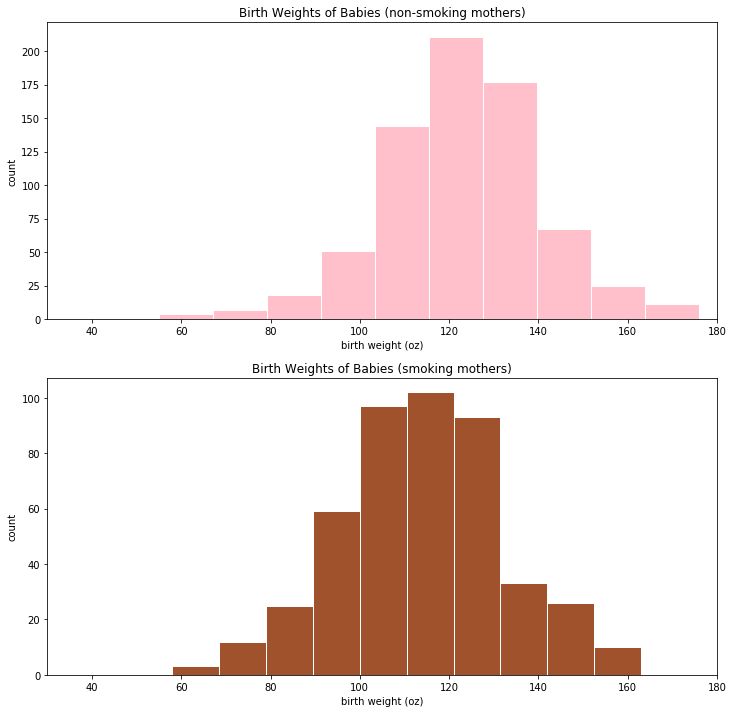

In [161]:
fig, axes = plt.subplots(2,1,figsize = (12,12))
dfBabiesSmoke=dfBabies.loc[dfBabies["smoke"] == 1]
dfBabiesNonSmoke=dfBabies.loc[dfBabies["smoke"] == 0]
axes[0].hist(dfBabiesNonSmoke["bwt"],
            facecolor = "pink",
            edgecolor = "white")
axes[1].hist(dfBabiesSmoke["bwt"],
            facecolor = "sienna",
            edgecolor = "white")
axes[0].set_xlim(30,180)
axes[0].set_xlabel("birth weight (oz)")
axes[0].set_ylabel("count")
axes[0].set_title("Birth Weights of Babies (non-smoking mothers)")

axes[1].set_ylabel("count")
axes[1].set_xlim(30,180)
axes[1].set_xlabel("birth weight (oz)")
axes[1].set_title("Birth Weights of Babies (smoking mothers)")


**Part C**: Based on the histograms in **Part B**, characterize the distribution of baby birth weights for both non-smoking and smoking mothers. 

***
The birth weights of babies from mothers who smoke is lower than the birth weights of babies from mothers who do not. The second graph is a shifted left version of the pink graph above.
***

**Part D**: What are the mean and median weight difference between babies of smokers and non-smokers?  Can you think of any reason not to use the mean as a measure of center to compare birth weights for this problem? 

**Part E**: Create side-by-side box-and-whisker plots to compare the birth weights of babies whose mothers never smoked and those who currently smoke.  Use the box-and-whisker plot conventions discussed in lecture. 

**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of body weights of babies within each smoking / non-smoking groups as well as the comparison of the two classes. 

### Challenge Problem
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors.  

In the 1954 book _How to Lie with Statistics_ authors Darrell Huff and Irving Geis describe many common ways that people concoct misleading graphics.  An excerpt from these chapters can be found [here](https://piazza.com/class_profile/get_resource/j6pfvv6b9ze4gi/j771gy7fdpe3e7).  

Your job is to go out onto the web and find some data that you find interesting.  Then create both a misleading and a non-misleading version of a graphical summary for the data. 